# 1. Download the data set


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/content/drive/MyDrive/Project/Phishing websites detection /5.urldata.csv')

# 3.Familiarizing with Data


In [2]:
df.shape

(10000, 18)

In [3]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

**Dataset consists of:**

**Categorical Features:** Have_IP, Have_At, Redirection, https_Domain, TinyURL, Prefix/Suffix, DNS_Record, iFrame, Mouse_Over, Right_Click, Web_Forwards, Label

**Numerical Features:** URL_Length, URL_Depth, Web_Traffic, Domain_Age, Domain_End

**Target Column:** Label (Phishing = 1, Legitimate = 0)

In [4]:
df

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,0,0,1,1,1,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

#Features
**1. Address Bar Based Features:**
Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.

Domain of URL

IP Address in URL

"@" Symbol in URL

Length of URL

Depth of URL

Redirection "//" in URL

"http/https" in Domain name

Using URL Shortening Services “TinyURL”

Prefix or Suffix "-" in Domain

**2. Domain Based Features:**
Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

DNS Record

Website Traffic

Age of Domain

End Period of Domain

 **3. HTML and JavaScript based Features:**
Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

IFrame Redirection

Status Bar Customization

Disabling Right Click

Website Forwarding

# 3.Data Visualization and Analysis


In [6]:
df.sample(n = 10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
4342,olx.ua,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
3613,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
1276,persianblog.ir,0,0,1,3,0,0,0,0,1,1,1,1,1,1,1,1,0
3545,screenrant.com,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0
2815,jezebel.com,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0
5319,exler-karosserie.at,0,0,0,4,0,0,0,1,0,1,0,1,0,0,1,0,1
3163,hdfcbank.com,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
7888,tinyurl.com,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,0,1
7317,premiumevents.ge,0,0,0,4,0,0,0,0,0,1,1,1,0,0,1,1,1
9607,kimpatterson.net,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,1


**A. Distribution of Numerical Features ==> Phishing URLs tend to be longer than legitimate ones.**



In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

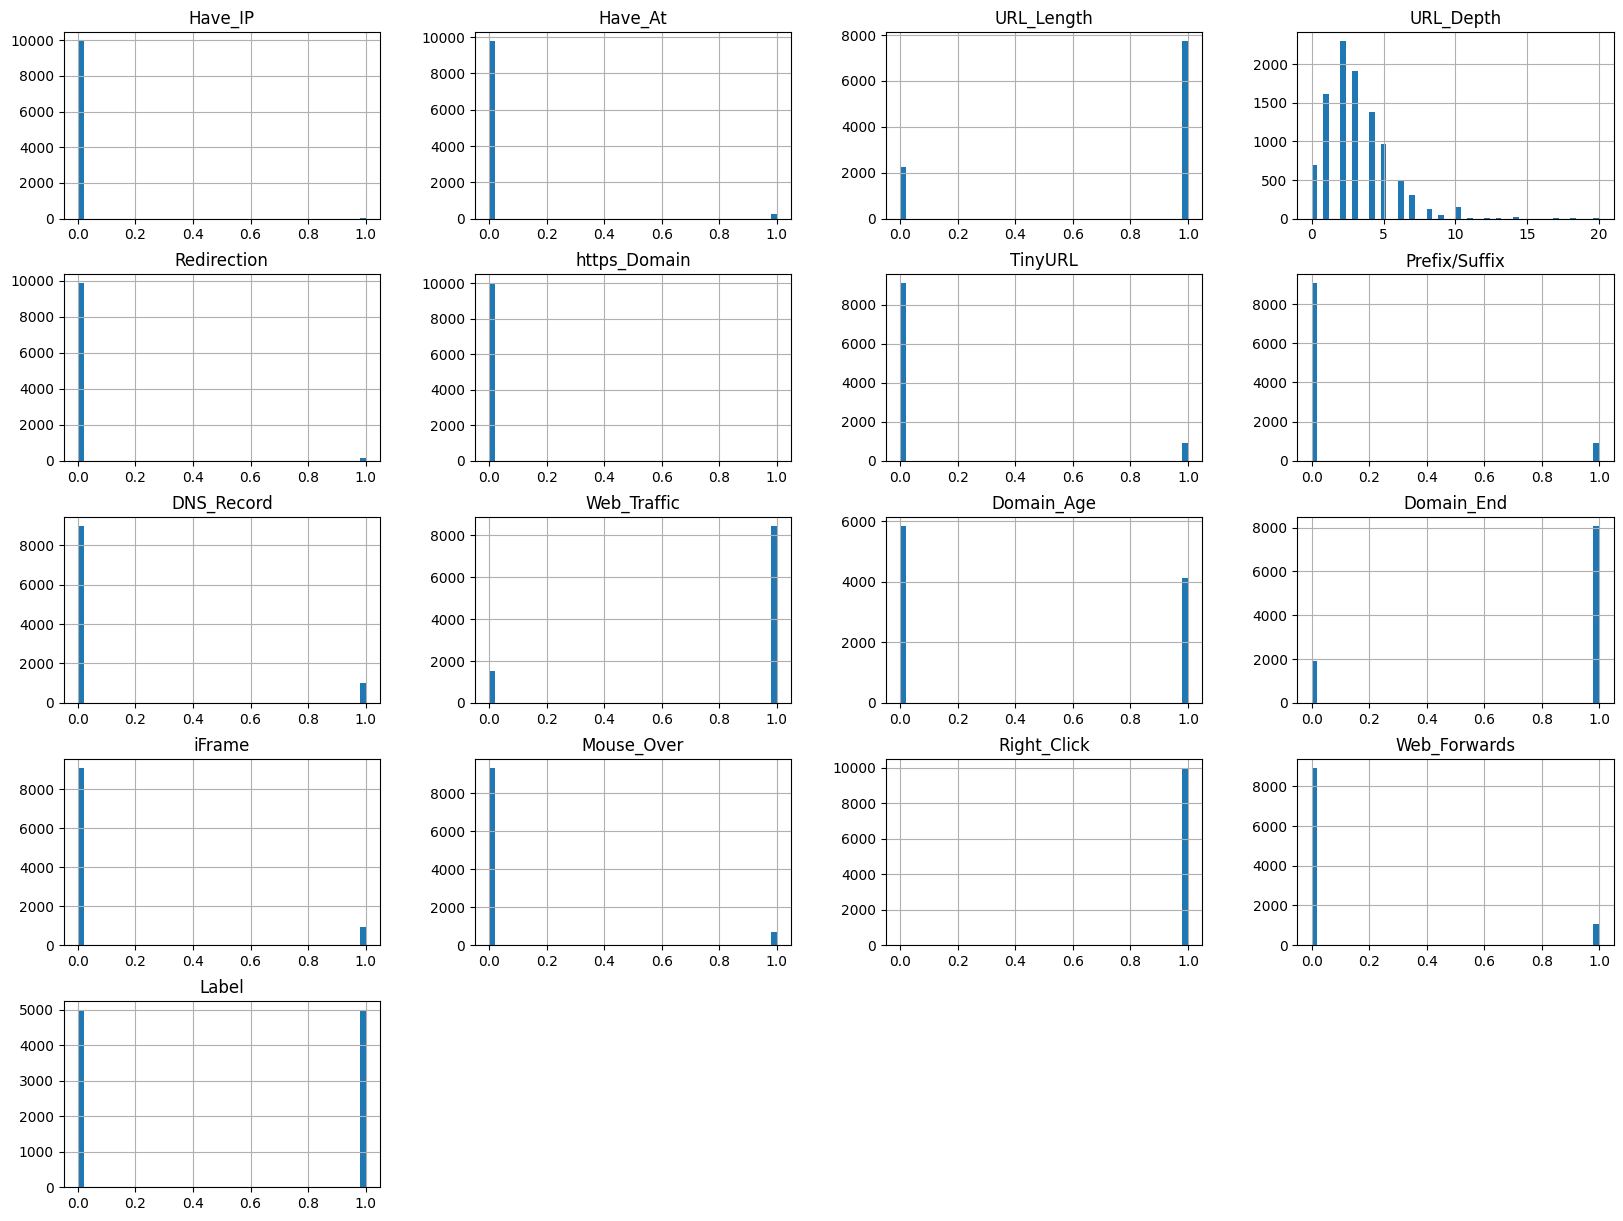

In [8]:
#plotting the data distribution
df.hist(bins = 50, figsize = (20,15))
plt.title("Distribution of URL Length")
plt.show()

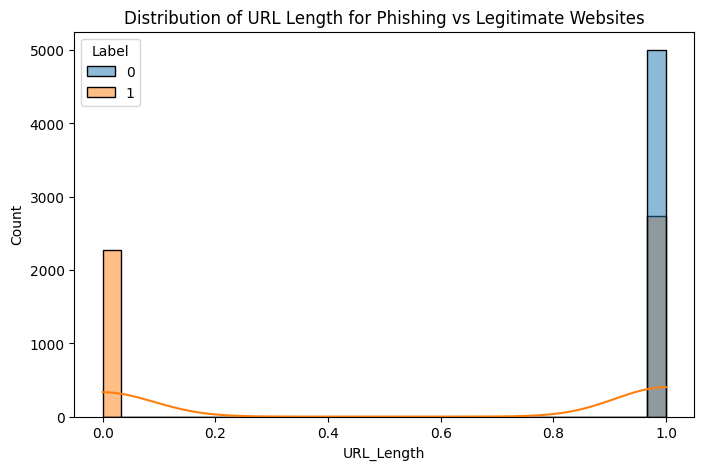

In [9]:
#Histogram for URL length
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="URL_Length", hue="Label", kde=True, bins=30)
plt.title("Distribution of URL Length for Phishing vs Legitimate Websites")
plt.show()


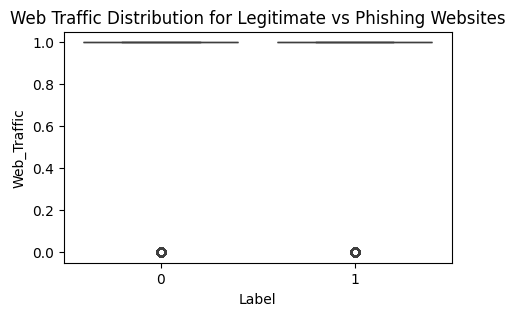

In [10]:
#Boxplot for Web Traffic: Legitimate sites generally have higher traffic, while phishing sites have low or no traffic
plt.figure(figsize=(5,3))
sns.boxplot(x=df["Label"], y=df["Web_Traffic"])
plt.title("Web Traffic Distribution for Legitimate vs Phishing Websites")
plt.show()


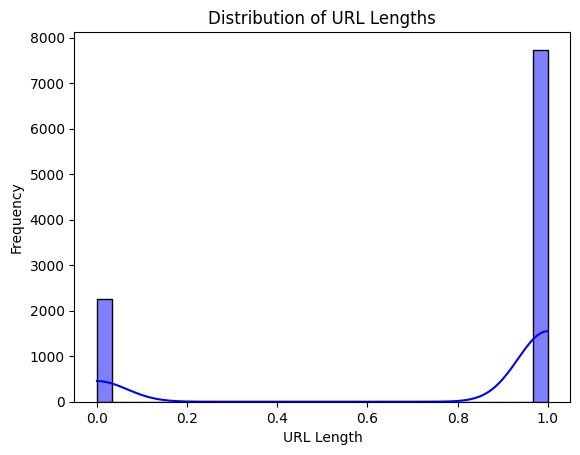

In [11]:
# Helps identify if features are skewed, normally distributed, or if any features need transformations.
sns.histplot(df['URL_Length'], kde=True, color='blue', bins=30)
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()



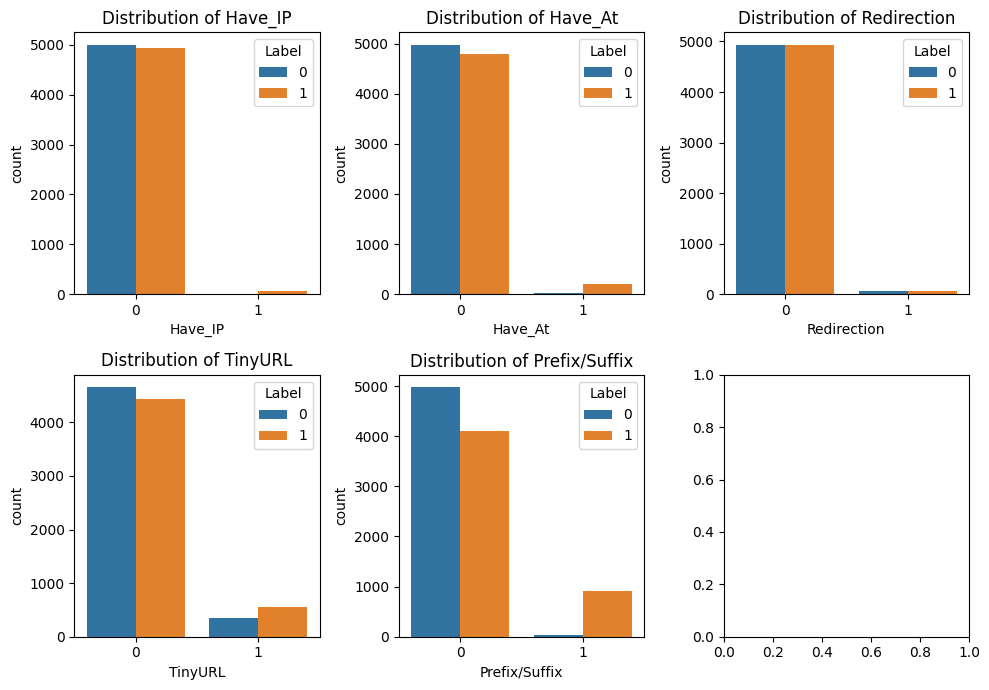

In [12]:
#Bar Plot for Have_IP, Have_At, Redirection, TinyURL, Prefix/Suffix .Phishing websites often have IP-based URLs and special symbols (@, -).
#  If phishing websites have more Have_At=1, Prefix/Suffix=1, TinyURL=1, these features can be strong indicators.
categorical_features = ["Have_IP", "Have_At", "Redirection", "TinyURL", "Prefix/Suffix"]
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for i, col in enumerate(categorical_features):
    ax = axes[i//3, i%3]
    sns.countplot(x=df[col], hue=df["Label"], ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


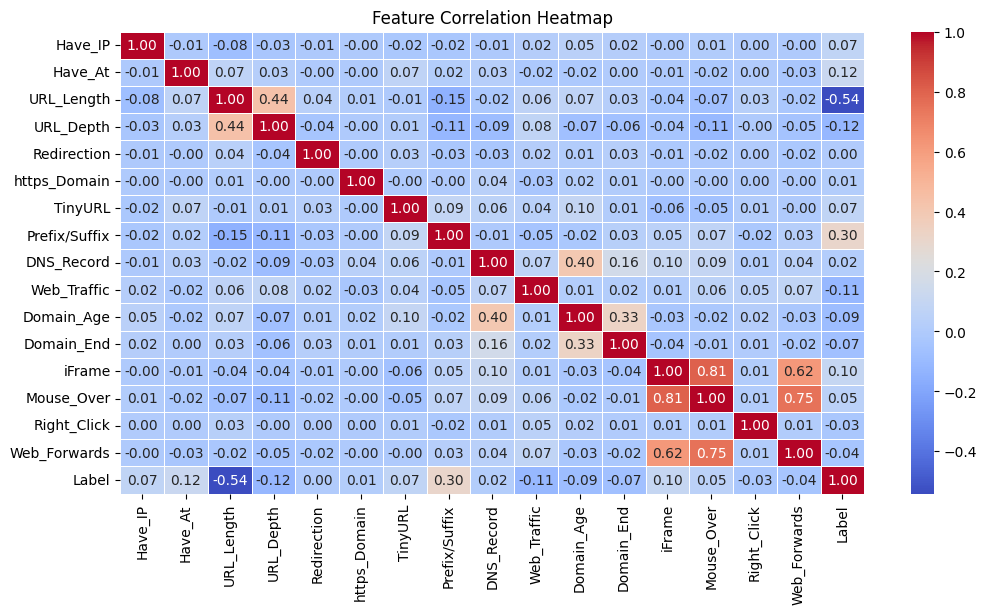

In [13]:
#correlation heatmap : Helps find relationships between features.
# If some features are highly correlated (e.g., Domain_Age & Domain_End), we can remove redundant ones.

numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


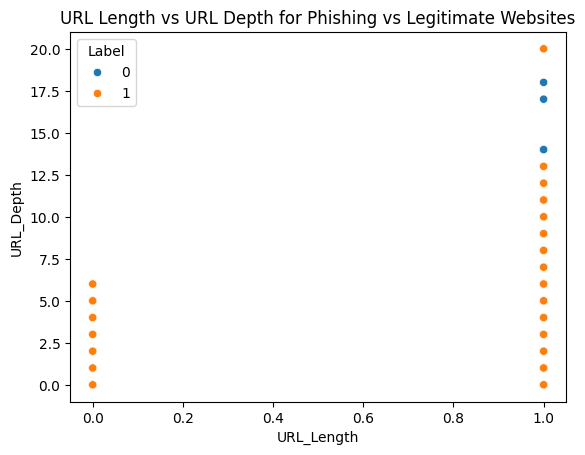

In [14]:
#Check how URL complexity affects phishing probability.
sns.scatterplot(x=df["URL_Length"], y=df["URL_Depth"], hue=df["Label"])
plt.title("URL Length vs URL Depth for Phishing vs Legitimate Websites")
plt.show()

# If phishing websites tend to have deep directory structures, then URL_Depth is usefu


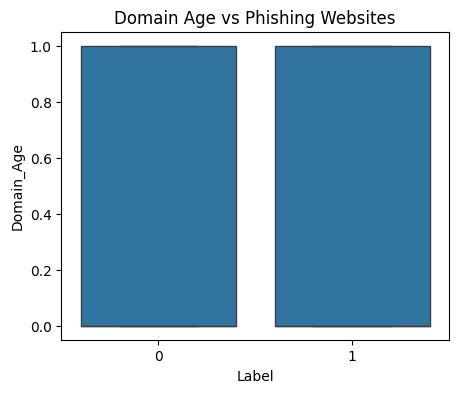

In [15]:
# Box plot for Domian Age : A low domain age may indicate phishing.
plt.figure(figsize=(5,4))
sns.boxplot(x=df["Label"], y=df["Domain_Age"])
plt.title("Domain Age vs Phishing Websites")
plt.show()


<ipython-input-16-b34fab81008a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='URL_Length', data=df, palette='Set2')


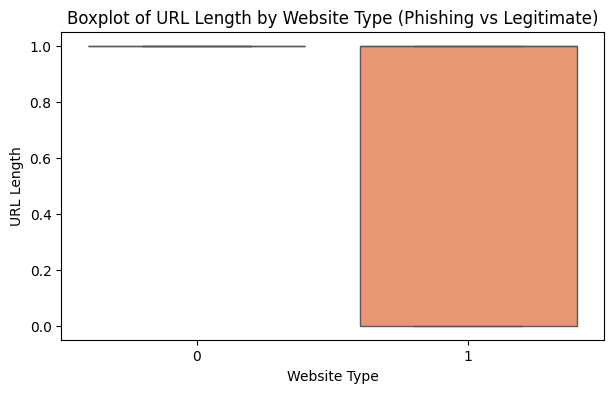

In [16]:
#Boxplot: To detect outliers in features like "number of subdomains".
plt.figure(figsize=(7, 4))
sns.boxplot(x='Label', y='URL_Length', data=df, palette='Set2')
plt.title('Boxplot of URL Length by Website Type (Phishing vs Legitimate)')
plt.xlabel('Website Type')
plt.ylabel('URL Length')
plt.show()



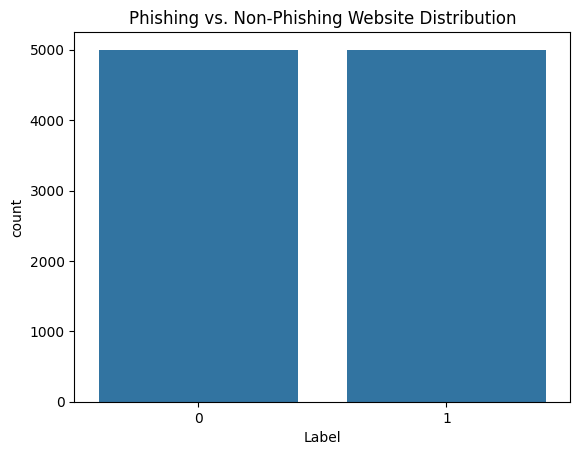

In [17]:
#Pie Chart / Bar Plot: To check the balance of phishing vs. non-phishing websites.
sns.countplot(x=df['Label'])
plt.title("Phishing vs. Non-Phishing Website Distribution")
plt.show()

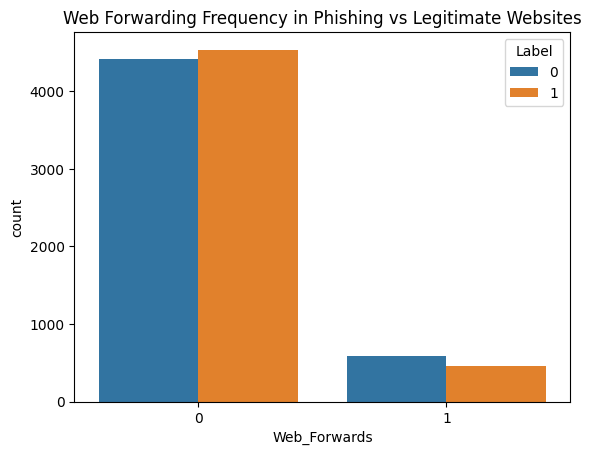

In [18]:
# Checking Web Forwarding and iFrame
#Phishing websites often use multiple redirections (Web_Forwards) and hidden frames (iFrame). then these feauture is important
sns.countplot(x=df["Web_Forwards"], hue=df["Label"])
plt.title("Web Forwarding Frequency in Phishing vs Legitimate Websites")
plt.show()


# Key Insights
📌 Phishing Websites Tend to Have:

1.Longer URLs (URL_Length).

2.More special characters like @, - (Have_At, Prefix/Suffix).

3.Lower Domain Age (recently created domains).

4.Lower Web Traffic.

5.More URL redirections (Redirection, Web_Forwards).

6.Use of Tiny URLs (TinyURL).

7.No DNS Record, or missing HTTPS (DNS_Record, https_Domain).

# 4.Data Preprocessing and Feature Selection


In [19]:
df.sample()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
2305,kenh14.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0


In [20]:
# Step 1:  handling missing values (if any)
df.isnull().sum()

,0
Domain,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0


In [21]:
#Step 2 : Removing unnecessary column.
df = df.drop(columns=["Domain"]) # Domain is just an identifier

In [22]:
# Step 3: Removing highly correlated features

corr_matrix =numerical_df.corr() # Compute correlation matrix

correlated_features = set()
correlation_threshold = 0.8 # Remove one of the highly correlated features (Threshold > 0.8)

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

df.drop(columns=correlated_features, inplace=True)
print(f"Removed correlated features: {correlated_features}")


Removed correlated features: {'Mouse_Over'}


In [23]:
# Step 4 : Selects only categorical features that have a significant impact on phishing.
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Select categorical features, excluding 'Mouse_Over'
categorical_features = ["Have_IP", "Have_At", "Redirection", "TinyURL", "Prefix/Suffix",
                        "DNS_Record", "iFrame", "Right_Click", "Web_Forwards"]  # Removed 'Mouse_Over'

X_cat = df[categorical_features]
y = df["Label"]

# Apply Chi-Square Test
chi_scores, p_values = chi2(X_cat, y)

# Convert to DataFrame
chi_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Score": chi_scores, "p-value": p_values})
chi_results = chi_results.sort_values(by="Chi2 Score", ascending=False)

# Keep only features with p-value < 0.05 (statistically significant)
selected_categorical_features = chi_results[chi_results["p-value"] < 0.05]["Feature"].tolist()
print("Selected Categorical Features:", selected_categorical_features)


Selected Categorical Features: ['Prefix/Suffix', 'Have_At', 'iFrame', 'Have_IP', 'TinyURL', 'Web_Forwards']


In [24]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,1,1,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,0,0,1,1,1,0
2,0,0,1,4,0,0,0,0,0,0,0,1,1,1,0,0
3,0,0,1,2,0,0,0,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1


# 5.Spliting the Data


In [25]:
# Sepratating & assigning features and target columns to X & y
y = df['Label']
x = df.drop('Label',axis=1)
x.shape, y.shape

((10000, 15), (10000,))

In [26]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state = 42)
x_train.shape, x_test.shape

((8000, 15), (2000, 15))

#6.Machine Learning Models & Training

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

Decision Tree

Random Forest

Multilayer Perceptrons

XGBoost

Autoencoder Neural Network

Support Vector Machines

In [27]:
#importing packages
from sklearn.metrics import accuracy_score

In [28]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

##6.1 Decision Tree Model


In [29]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(x_train, y_train)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)


In [30]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)



print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.816
Decision Tree: Accuracy on test Data: 0.803


**Performance Evaluation**

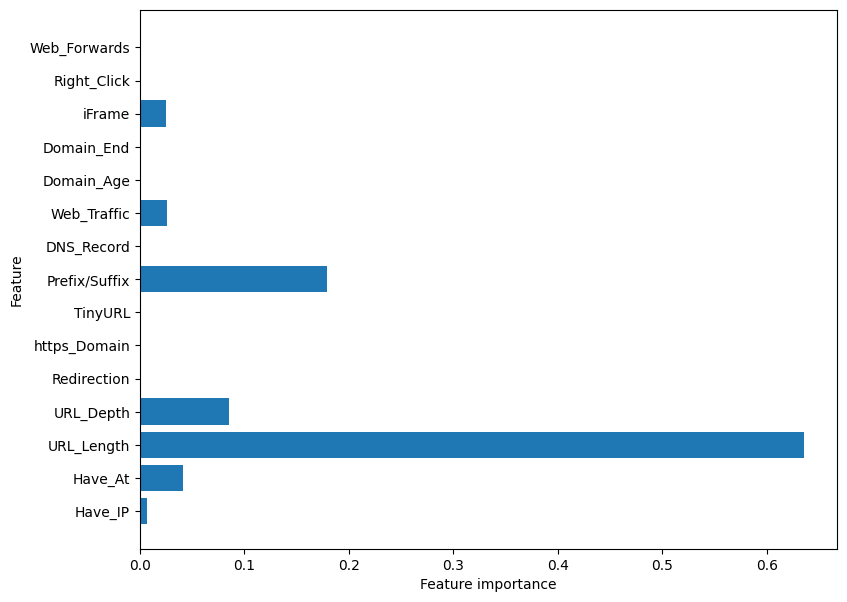

In [31]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83       962
           1       0.98      0.63      0.77      1038

    accuracy                           0.80      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.85      0.80      0.80      2000



<Axes: >

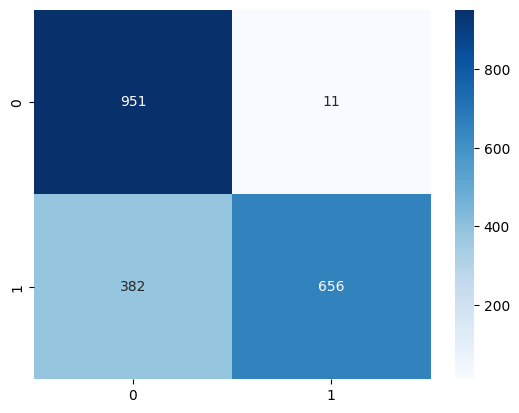

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_test_tree))
sns.heatmap(confusion_matrix(y_test, y_test_tree), annot=True, fmt="d", cmap="Blues")


**Storing the Result:**

In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

#6.2 Multilayer Perceptron

In [34]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(x_train, y_train)


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [35]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(x_test)
y_train_mlp = mlp.predict(x_train)

**Performance Evaluation:**

In [36]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.865
Multilayer Perceptrons: Accuracy on test Data: 0.851


**Storing the results:**

In [37]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

#6.3 Support Vector Machine


In [38]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=12)

In [39]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

**Performance Evaluation**

In [40]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.805
SVM : Accuracy on test Data: 0.786


**Storing Result**

In [41]:
storeResults('SVM', acc_train_svm, acc_test_svm)

##6.4 Bagging (e.g., Random Forest Classifier)

In [42]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
forest = RandomForestClassifier(max_depth=5)

#fit the model
forest.fit(x_train, y_train)

#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

**Performance Evaluation**

In [43]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.816
Random forest: Accuracy on test Data: 0.800


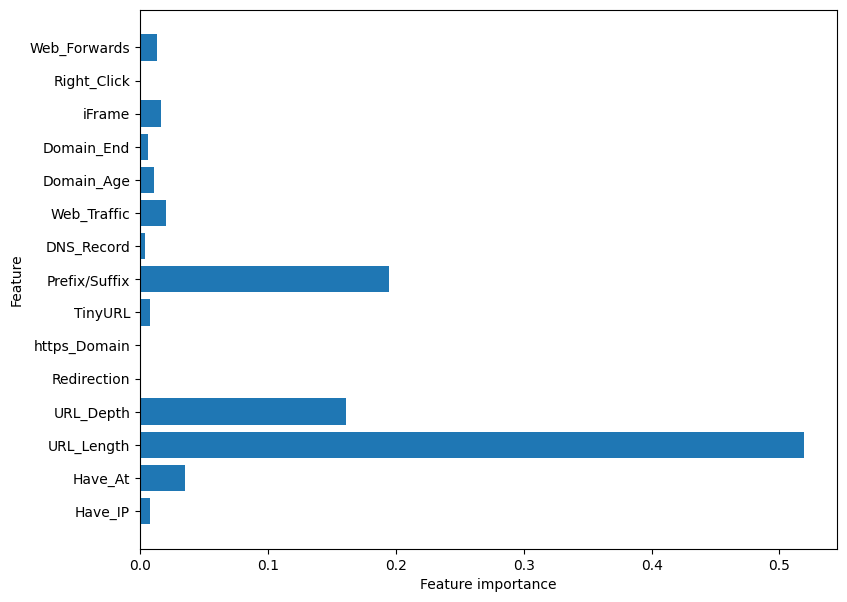

In [44]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [45]:
#storing the results.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

##6.5  Boosting (using XGBoost Classifier)

In [46]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)

**Performance Evaluation**

In [48]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.868
XGBoost : Accuracy on test Data: 0.854


**Storing the Result**

In [49]:
 storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

##6.6 Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier

# creating classifiers of models to use in voting classifier
dt = DecisionTreeClassifier()
svm = SVC(probability=True)
mlp = MLPClassifier(max_iter=1000)

# Create ensemble model
ensemble = VotingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('mlp', mlp)],
    voting='soft'  # 'hard' for majority vote, 'soft' for weighted prob.
)

# Fit and evaluate
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

# Calculate accuracies
acc_train_voting = accuracy_score(y_train, ensemble.predict(x_train))
acc_test_voting = accuracy_score(y_test, ensemble.predict(x_test))

# Store the results
storeResults('Voting Classifier', acc_train_voting, acc_test_voting)


#Print results
print("Voting Classifier: Accuracy on training Data: {:.3f}".format(acc_train_voting))
print("Voting Classifier: Accuracy on Testing Accuracy: {:.3f}".format(acc_test_voting))



Voting Classifier: Accuracy on training Data: 0.862
Voting Classifier: Accuracy on Testing Accuracy: 0.855


##6.7  Autoencoder Neural Network

In [51]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [52]:
#building autoencoder model

input_dim = x_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │           240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,138 (4.45 KB)

 Trainable params: 1,138 (4.45 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1123 - loss: 1.8388 - val_accuracy: 0.1706 - val_loss: -0.6878
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1199 - loss: -0.8271 - val_accuracy: 0.0200 - val_loss: -0.9175
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0193 - loss: -1.0004 - val_accuracy: 0.0019 - val_loss: -1.0416
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0148 - loss: -1.1297 - val_accuracy: 0.0225 - val_loss: -1.1223
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0118 - loss: -1.1989 - val_accuracy: 0.0044 - val_loss: -1.1974
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0067 - loss: -1.2953 - val_accuracy: 0.0044 - val_loss: -1.2337
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0142 - loss: -1.2990 - val_accuracy: 0.0031 - val_loss: -1.2729
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: -1.3381 - va

###Performance Evaluation:

In [54]:
acc_train_auto = autoencoder.evaluate(x_train, x_train)[1]
acc_test_auto = autoencoder.evaluate(x_test, x_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0600 - loss: -1.4007
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0700 - loss: -1.4965

Autoencoder: Accuracy on training Data: 0.060
Autoencoder: Accuracy on test Data: 0.072


###Storing the results:

In [55]:
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

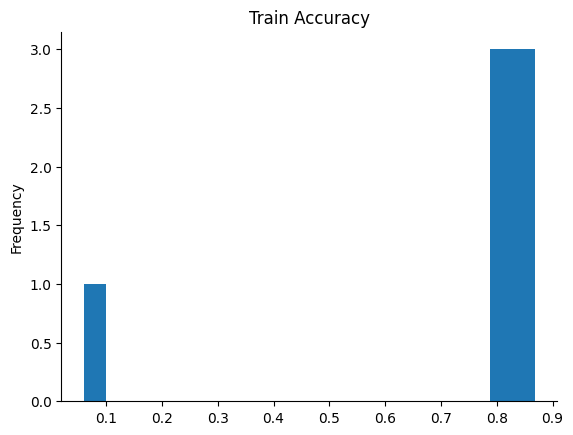

In [56]:
# @title Train Accuracy

from matplotlib import pyplot as plt

#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    # Make sure results DataFrame is defined before usage
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})

results['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

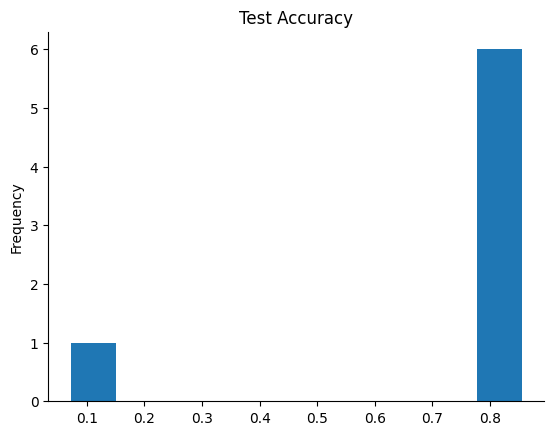

In [57]:
# @title Test Accuracy

from matplotlib import pyplot as plt
results['Test Accuracy'].plot(kind='hist', bins=10, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.816,0.803
1,Multilayer Perceptrons,0.865,0.851
2,SVM,0.805,0.786
3,Random Forest,0.816,0.800
4,XGBoost,0.868,0.854
5,Voting Classifier,0.862,0.855
6,AutoEncoder,0.060,0.072


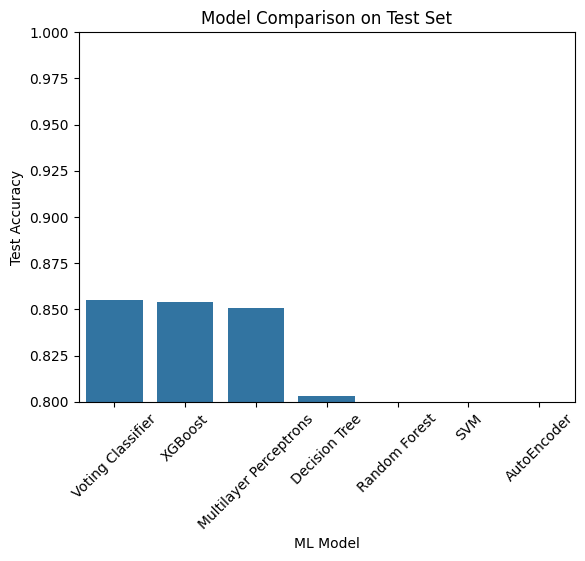

In [59]:
results = pd.DataFrame({
    'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test
})

results.sort_values(by='Test Accuracy', ascending=False, inplace=True)
sns.barplot(data=results, x='ML Model', y='Test Accuracy')
plt.title('Model Comparison on Test Set')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.show()


#Saving the models

In [60]:
import joblib
import re
from urllib.parse import urlparse
import requests
!pip install python-whois
import whois
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model


# Saving models
joblib.dump(tree, 'decision_tree_model.pkl')
joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(forest, 'random_forest_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')
joblib.dump(ensemble, 'voting_classifier_model.pkl')
autoencoder.save('autoencoder_model.h5')  # Saving Autoencoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.1 MB/s eta 0:00:00


In [61]:
autoencoder.save('autoencoder_model.h5')  # Saving Autoencoder


#Full Working Function with raw data


#Load the Models

In [62]:
# Loading models
tree = joblib.load('decision_tree_model.pkl')
mlp = joblib.load('mlp_model.pkl')
svm = joblib.load('svm_model.pkl')
forest = joblib.load('random_forest_model.pkl')
xgb = joblib.load('xgboost_model.pkl')
ensemble = joblib.load('voting_classifier_model.pkl')
autoencoder.save('autoencoder_model.keras')  # Native Keras format


In [63]:
# # Step 2: Feature Extraction Function


import whois
import time

def extract_features(url):
    features = {}

    # 1. Domain (Extracted from the URL)
    domain = urlparse(url).netloc
    features['Domain'] = domain

    # 2. Have_IP (Check if it's an IP address)
    features['Have_IP'] = 1 if bool(re.match(r"\d+\.\d+\.\d+\.\d+", domain)) else 0

    # 3. Have_At (Check if '@' is in the URL)
    features['Have_At'] = 1 if '@' in url else 0

    # 4. URL_Length (Length of the URL)
    features['URL_Length'] = len(url)

    # 5. URL_Depth (Number of '/' in the URL)
    features['URL_Depth'] = url.count('/')

    # 6. Redirection (Check for redirection-related keywords in URL)
    redirection_keywords = ['redir', 'redirect']
    features['Redirection'] = 1 if any(keyword in url for keyword in redirection_keywords) else 0

    # 7. https_Domain (Check if URL starts with 'https')
    features['https_Domain'] = 1 if url.startswith('https://') else 0

    # 8. TinyURL (Check if URL contains TinyURL or any known shortener)
    features['TinyURL'] = 1 if 'tinyurl' in url else 0

    # 9. Prefix/Suffix (Check if URL contains www or a common suffix)
    features['Prefix/Suffix'] = 1 if ('www' in domain or domain.endswith(('com', 'org', 'net'))) else 0

    # 10. DNS_Record (We can simulate it here by checking if the domain is resolvable)
    try:
        requests.get(f'http://{domain}', timeout=3)
        features['DNS_Record'] = 1
    except requests.exceptions.RequestException:
        features['DNS_Record'] = 0

    # 11. Web_Traffic (Could be based on Alexa Rank or similar metrics, here we mock it)
    features['Web_Traffic'] = 1 if domain in ["google.com", "facebook.com"] else 0  # Example

    # 12. Domain_Age (Using WHOIS data to get domain age)
    try:
        domain_info = whois.whois(domain)
        creation_time = domain_info.creation_date
        if creation_time:
            age = (time.time() - time.mktime(creation_time[0].timetuple())) / (60 * 60 * 24 * 365)
            features['Domain_Age'] = max(0, int(age))
        else:
            features['Domain_Age'] = 0
    except whois.exceptions.WhoisException as e:
        # Handle Whois lookup failure
        features['Domain_Age'] = 0

    # 13. Domain_End (Top-level domain)
    tld = domain.split('.')[-1]
    features['Domain_End'] = tld

    # 14. iFrame (Check if URL contains <iframe> tag, used in phishing sites)
    try:
        response = requests.get(url, timeout=3)
        features['iFrame'] = 1 if '<iframe>' in response.text else 0
    except requests.exceptions.RequestException:
        features['iFrame'] = 0

    # 15. Mouse_Over (Check for mouseover JS events in the source code)
    try:
        response = requests.get(url, timeout=3)
        features['Mouse_Over'] = 1 if 'onmouseover' in response.text else 0
    except requests.exceptions.RequestException:
        features['Mouse_Over'] = 0

    # 16. Right_Click (Check if right-click is disabled via JS)
    try:
        response = requests.get(url, timeout=3)
        features['Right_Click'] = 1 if 'oncontextmenu' in response.text else 0
    except requests.exceptions.RequestException:
        features['Right_Click'] = 0

    # 17. Web_Forwards (Check if URL uses forwarding)
    features['Web_Forwards'] = 1 if 'forwarding' in url else 0

    return features



In [64]:
#classify function

def classify_url(url, model):
    features = extract_features(url)
    features_df = pd.DataFrame([features])

    # For models that do not have 'feature_names_in_'
    if hasattr(model, 'feature_names_in_'):
        # For models like DecisionTree, RandomForest, etc.
        training_features = model.feature_names_in_
        features_df = features_df[training_features]

        # Handle categorical variables if needed
        if 'Domain_End' in training_features:
            if not hasattr(classify_url, 'domain_end_encoder'):
                classify_url.domain_end_encoder = LabelEncoder()
                classify_url.domain_end_encoder.fit(features_df['Domain_End'])
            features_df['Domain_End'] = classify_url.domain_end_encoder.transform(features_df['Domain_End'])
    else:
        # For models like MLP that do not have 'feature_names_in_'
        # Assuming the features passed to MLP are consistent
        pass  # No need to filter the features for models like MLP

    # Make the prediction
    prediction = model.predict(features_df)

    return "Phishing" if prediction == 1 else "Legitimate"


In [65]:
# Step 4: Example Usage
import whois
import time

# URL to check
url = "http://security-paypal.com.login.account.update.info"
result = classify_url(url, ensemble)
print(f"The URL is: {result}")

2025-04-28 07:42:42,844 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


The URL is: Phishing


In [66]:
url = "http://security-paypal.com.login.account.update.info"
result = classify_url(url, tree)  # Use the Decision Tree model
print(f"According to Decision Tree the URL is: {result}")

result = classify_url(url, forest)  # Use the Random Forest model
print(f"According to Random Forest the URL is: {result}")





2025-04-28 07:42:53,357 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


According to Decision Tree the URL is: Legitimate


2025-04-28 07:43:04,830 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


According to Random Forest the URL is: Legitimate


In [67]:
result = classify_url(url, xgb)  # Use the XGBoost model
print(f"According to XGboost the URL is: {result}")

result = classify_url(url, ensemble)  # Use the Voting Classifier
print(f"According to Voting Classifier the URL is: {result}")

2025-04-28 07:43:15,381 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


According to XGboost the URL is: Phishing


2025-04-28 07:43:26,828 - whois.whois - ERROR - Error trying to connect to socket: closing socket - timed out
ERROR:whois.whois:Error trying to connect to socket: closing socket - timed out


According to Voting Classifier the URL is: Phishing
